<a href="https://colab.research.google.com/github/Akhil9037/GRAVITATIONAL-waves-/blob/main/PN__app_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

η =  0.25
xlow =  0.0336997335060572
xhigh =  0.18287037037037038
a4(1) =  7.6181852176382066
a4.5(1) =  535.1980682872841
a5(1) =  413.8820891710324
a5.5(1) =  1533.8963676993062
a6(1) =  2082.2302605990744
xt3.5(1) =  411.30681617595246
xt4to6(1) =  14633.039907117876
xt6(1) =  15044.34672329383
dxdt(10) =  5.785074655329786e+18
IntegrationSteps =  8387
r0pn =  1.0
r1pn =  -0.9166666666666665
r2pn =  1.1944444444444438
r3pn =  -2.0718780002752886


<ipython-input-1-a1657c86e900>:289: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return(derivative(radius,t,dx = 6e-5)) #Derivative of radius wrt time


Ahins =  5.54802500309756e-19


Text(0.5, 1.0, 'Strain Evolution')

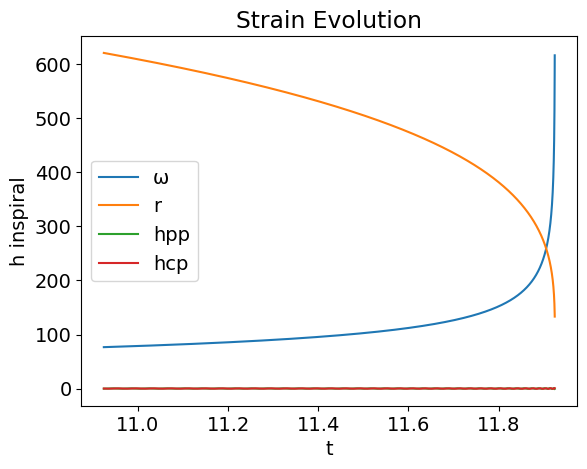

In [1]:
from numpy import *
from scipy.misc import derivative
from scipy.special import zeta
from scipy.special import hyp2f1

from scipy.integrate import odeint
from math import cos
from math import sin
import numpy as np
import numpy as math
import matplotlib.pyplot as plt
m1 = 20; m2 = 20; # Individual Mass Parameters

sf = 100000     #Scale Factor

q = m1/m2;        # Mass Ratio

M = m1 + m2;      # Total Mass

μ = (m1*m2)/M;    # Reduced Mass

η = μ/M;          # Symmetric Mass Ratio

print("η = ",η);   #accuracy check

Ms = M*(4.923*10**(-6));# Mass in terms of seconds

Mr = M*(1.476);         # Mass in terms of kilometers

G = c = 1 ;             # Geometric units (G = c)

γ = 0.5772156649;       # Euler's Constant

e = 0;                  # 0 eccentricity, circular orbit

R = 1;                  # distance to observer

i = 0; κ = 0;           # optimal angular orientation is assumed

flow = 10;              # frequency cut-off of 10 Hz

G = 6.673*10**(-11); c = 2.998*10**(8)

Mokg = (1.989*10**(30)); Mos = (4.923*10**(-6)); Mokm = (1.476) #expressing individual units for mass

Ms = M*Mos; Mr = M*Mokm; #writing mass in terms of 2 variables for different units

v0 = ((G*M*Mokg*pi*flow)**(1/3)) #initial velocity of binary



def makeGraphable(f,tarray,size,multiply=1,add=0,graph=True,label=''):

    fs = [0] * size
    n = 0
    for i in tarray:
        fs[n] = f(i)*multiply + add
        n = n + 1
    if graph == True:
        plt.plot(tarray,fs,label=label)
    return(fs)

#Inputs array, size of array, and modifiers to the array for multiplication and addition
#Returns the array modified by the input parameters
def modifyArray(f,size,multiply=1,add=0):
    n=0
    fs = [0] * size
    for i in f:
        fs[n] = f[n]*multiply + add
        n = n + 1
    return(fs)



#temporary final integration bound
temp = 100;

xlow = (pi*M*Mos*flow)**(2/3); #
print("xlow = ", xlow); # check for accuracy

xhigh = (1/6)*(1+((7/18)*η)); #
print("xhigh = ", xhigh); #check for accuracy


c0 = 153.8803;               #Tiec et al., arxiv.org/pdf/1609.05933, eq (4.25)

c1 = -55.13;                 #Constants used in PN coefficients

c2 = 588;

c3 = -1144;



# Buskirk and Babiuc arxiv.org/pdf/1810.06160

#PN coefficients

#coefficient a = 1
a1 = ((-743/336)-11/4*η)

#coefficient a = 1.5
a1p5 = (4*pi)

#coefficient a = 2
a2 = (34103/18144 + 13661/2016*η + 59/18*η**2)

#coefficient a = 2.5
a2p5 = ((-4159*pi)/672 - (189*pi)/8*η)

#coefficient a = 3
def a3(xt):
    return((16447322263/139708800 - (1712*γ)/105 + (16*pi**2)/3- 856/105*math.log(16*xt) + (-56198689/217728 + (451*pi**2)/48)*η+ 541/896*η**2 - 5605/2592*η**3))

#coefficient a = 3.5
a3p5 = ((-(4415/4032) + 358675/6048*η + 91945/1512*η**2)*pi)

def a4(xt):
    return((-5*η*c0) - ((97*η**4)/3888) - ((18929389*η**3)/435456) - ((3157*pi**2*η**2)/144) + ((54732199*η**2)/93312) - (47468/315*η*math.log(xt)) -((31495*pi**2*η)/8064) - ((856*γ*η)/315) + ((59292668653*η)/838252800) - ((1712/315*η)*math.log(2)) + ((124741*math.log(xt)/8820)) - ((361*pi**2)/126) + ((124741*γ)/4410) + (3959271176713/25427001600) - ((47385*math.log(3)/1568)) + ((127751*math.log(2)/1470)))
print("a4(1) = ",a4(1));

#Coefficient a4.5
def a4p5(xt):
    return((9731*pi*η**3)/1344 + ((42680611*pi*η**2)/145152) + ((205*pi**3*η)/6) - ((51438847*pi*η)/48384) - (3424/105*pi*math.log(xt)) - ((6848*γ*pi)/105) + ((343801320119*pi)/745113600) - (13696/105*pi*math.log(2)))
print("a4.5(1) = ",a4p5(1))

#Coefficient a5
def a5(xt):
    return(((155*c0*η**2)/12) + ((1195*c0*η)/336) - (6*η*c1) - ((11567*η**5)/62208) + ((51474823*η**4)/1741824) + ((9799*(pi**2)*η**3)/384) -((9007776763*η**3)/11757312) + (216619/189*η**2*math.log(xt)) - ((126809*(pi**2)*η**2)/3024) - ((2354*γ*η**2)/945) + ((1362630004933*η**2)/914457600) - (4708/945*η**2*math.log(2)) + ((53963197*η*math.log(xt))/52920) + ((14555455*pi**2*η)/217728) + ((3090781*γ*η)/26460) - ((847101477593593*η)/228843014400) - ((15795*η*math.log(3))/3136) + (2105111*η*math.log(2)/8820) - (5910592*math.log(xt)/1964655) - ((21512*pi**2)/1701) - ((11821184*γ)/1964655) + (29619150939541789/36248733480960)+ ((616005*math.log(3))/3136) - ((107638990*math.log(2))/392931))
print("a5(1) = ",a5(1))

#Coefficient a5.5
def a5p5(xt):
    return(((-20*pi*η*c0) + ((49187*pi*η**4)/6048) - ((7030123*pi*η**3)/13608) - ((112955*pi**3*η**2)/576) + ((1760705531*pi*η**2)/290304) - (189872/315*pi*η*np.log(xt)) - ((26035*pi**3*η)/16128) - ((3424*γ*pi*η)/315) - ((2437749208561*pi*η)/4470681600) - (6848/315*pi*η*np.log(2)) + ((311233*pi*np.log(xt))/11760) + ((311233*γ*pi)/5880) + ((91347297344213*pi)/81366405120) - (142155/784*pi*np.log(3)) + ((5069891*pi*np.log(2))/17640)))
print("a5.5(1) = ",a5p5(1))

#Coefficient a6, uses zeta function
def a6(xt):
    return((((-535*c0*η**3)/36)) + ((7295*c0*η**2)/336) - ((248065*c0*η)/4536) + ((31*c1*η**2)/2) + ((239*c1*η)/56) - (7*c2*η) - (7*c3*η*math.log(xt)) - (c3*η) - ((155377*η**6)/1679616) - ((152154269*η**5)/10450944) - ((1039145*pi**2*η**4)/62208) + ((76527233921*η**4)/94058496) - ((41026693*η**3*math.log(xt))/17010) + ((55082725*pi**2*η**3)/217728) - ((2033*γ*η**3)/1701) - ((56909847373567*η**3)/7242504192) - ((4066*η**3*math.log(2))/1701) - ((271237829*η**2*math.log(xt))/127008) + ((92455*pi**4*η**2)/1152) - ((4061971769*pi**2*η**2)/870912) - ((21169753*γ*η**2)/317520) +((3840832667727673*η**2)/55477094400) - ((57915*η**2*math.log(3))/12544) - ((2724535*η**2*math.log(2))/21168) - (4387/63*pi**2*η*math.log(xt)) - ((12030840839*η*math.log(xt))/37721376) + ((410*pi**4*η)/9 - 8774/63*γ*pi**2*η) + ((206470485307*pi**2*η)/1005903360) + ((362623282541*γ*η)/94303440) - ((12413297162366594971*η)/271865501107200) + ((3016845*η*math.log(3))/12544) - (17548/63*pi**2*η*math.log(2)) + ((701463800861*η*math.log(2))/94303440) + ((366368*math.log(xt)**2)/11025) + ((2930944*math.log(2)*math.log(xt))/11025) - (13696/315*pi**2*math.log(xt)) + ((1465472*γ*math.log(xt))/11025) - ((155359670313691*math.log(xt))/157329572400) - ((27392*zeta(3))/105) - ((256*pi**4)/45) - ((27392*γ*pi**2)/315) + ((1414520047*pi**2)/2619540) + ((1465472*γ**2)/11025) - ((155359670313691*γ)/78664786200) + (1867705968412371074441833/154211174411374080000) + ((5861888*math.log(2)**2)/11025) - ((37744140625*math.log(5))/260941824) - ((63722699919*math.log(3))/112752640) - (54784/315*pi**2*math.log(2)) + ((5861888*γ*math.log(2))/11025) - ((206962178724547*math.log(2))/78664786200))
print("a6(1) = ",a6(1))



# Buskirk and Babiuc arxiv.org/pdf/1810.06160 Eq. 6

#First half of PN sum
def xt3p5(xt):
    return(64/5*η*xt**5*(1 + (a1*xt + a1p5*xt**1.5 + a2*xt**2 + a2p5*xt**2.5 + a3(xt)*xt**3 + a3p5*xt**3.5)))
print("xt3.5(1) = ", xt3p5(1))

#Second half of PM sum
def xt4to6(xt):
    return(64/5*η*xt**5*(a4(xt)*xt**4 + a4p5(xt)*xt**4.5 + a5(xt)*xt**5 + a5p5(xt)*xt**5.5 + a6(xt)*xt**6))
print("xt4to6(1) = ", xt4to6(1))

#Total PM sum -- equal to Ms*dx/dt
def xt6(xt):
    return(xt3p5(xt) + xt4to6(xt))
print("xt6(1) = ",xt6(1))

#Final right hand side of DE, converted into geom. units
def dxdt(xt):
    return(xt6(xt)/Ms)
print("dxdt(10) = ",dxdt(10)) #time derivative of PN parameter-x. Now the DE is ready to be solved in order to find x


tStiff = 11.9248
tf = 2*Ms
tFin = tStiff-tf
ti=tFin-1
#Function of x and t to use for solving the DE
def dx_dt(x, t):
       return(dxdt(x))
ts = np.linspace(0,tFin,sf)
x0 = xlow  # the initial condition
xs = odeint(dx_dt, x0, ts,) #Solves for x                               #Read about other ways to calculate this and compare with Mathematica
xs = np.array(xs).flatten()# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size


IntegrationSteps = int(sf/tFin)

IntegrationSteps = IntegrationSteps + 1
print("IntegrationSteps = ",IntegrationSteps)
StartIndex = sf - IntegrationSteps

tsadjusted = ts[StartIndex:]
#Creates new arrays of x and t data by mapping the data found using ODEint onto the specific time interval that we want
step = 0
l = 0
tscaled = [0] * IntegrationSteps
xscaled = [0] * IntegrationSteps
for x in ts:
    if x > tFin:
        break
    if x > ti:
        xscaled[step] = xs[l]
        tscaled[step] = x
        step = step + 1
    l = l + 1

#This algorythm takes the data from the x and t arrays and creates a function that maps specific x's to specific t's
def xins(t):
    j = 0
    for i in xscaled:
        if tscaled[j] == t:
            return(xscaled[j])
        if tscaled[j] > t:
            if j == 0:
                return(xscaled[j])
            return(xscaled[j-1])
        j = j + 1
        if t > tscaled[IntegrationSteps - 1]:
            return(xscaled[IntegrationSteps - 1])
    return(1)




def ω(t):
    return(xins(t)**1.5/Ms) #Frequency derived by relationship of velocity to frequency


#This algorythm takes a function and maps it onto an array so that it can be plotted
ωs = makeGraphable(ω,tscaled,IntegrationSteps,label='ω')



#Change in angle is equal over time is equal to angular frequency
def dΦ_dt(Φ, t):
    return(ω(t))

#Solve the DE
phi0 = 0
solphi = odeint(dΦ_dt, phi0, tscaled)
solphi = np.array(solphi).flatten()# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size



#This algorythm provides a map to turn the array of data points from the DE solution into a function of time.
def phiins(t):
    j = 0                                #i.e so that f(t) = x
    for i in tscaled:
        if tscaled[j] > t:
            return(solphi[j-1])
        if tscaled[j] == t:
            return(solphi[j])
        if t > tscaled[IntegrationSteps - 1]:
            return(solphi[IntegrationSteps - 1])
        j = j + 1
    return(t)



#Equations from Hinder et al. arxiv.org/pdf/0806.1037
#Coefficients from Memmesheimer et al. arxiv.org/pdf/gr-qc/0407049

#Different eccentricities can be used for this portion. If e = 0, all cos terms cancel out
#default angle for ease of calculation
θ = pi/2

#coefficient r0
r0pn = (1 - e*cos(θ))
print("r0pn = ",r0pn)

#coefficient r1
r1pn = ((2*(e*cos(θ) - 1))/(e**2 - 1) + 1/6*(2*(η - 9) + e*(7*η - 6)*cos(θ)))
print("r1pn = ",r1pn)

#coefficient r2
r2pn = (1/(1 - e**2)**2*(1/72*(8*η**2 + 30*η + 72)*e**4 + 1/72*(-16*η**2 - 876*η + 756)*e**2 + 1/72*(8*η**2 + 198*η + 360) + (1/72*(-35*η**2 + 231*η - 72)*e**5 + 1/72*(70*η**2 - 150*η - 468)*e**3 + 1/72*(-35*η**2 + 567*η - 648)*e)*cos(θ) + (1 - e**2)**(1/2)*(1/72*(360 - 144*η)*e**2 + 1/72*(144*η - 360) + (1/72*(180 - 72*η)*e**3 + 1/72*(72*η - 180)*e)*cos(θ))))
print("r2pn = ",r2pn)

#coefficient r3
r3pn = 1/(181440*(1 - e**2)**(7/2))*((-665280*η**2 + 1753920*η - 1814400)*e**6 + (725760*η**2 - 77490*pi**2*η + 5523840*η - 3628800)*e**4 + (544320*η**2 + 154980*pi**2*η - 14132160*η + 7257600)*e**2 - 604800*η**2 + 6854400*η + ((302400*η**2 - 1254960*η + 453600)*e**7 + (-1542240*η**2 - 38745*pi**2*η + 6980400*η - 453600)*e**5 + (2177280*η**2 + 77490*pi**2*η - 12373200*η + 4989600)*e**3 + (-937440*η**2 - 38745*pi**2*η + 6647760*η - 4989600)*e)*cos(θ) + (1 - e**2)**(1/2)*((-4480*η**3 - 25200*η**2 + 22680*η - 120960)*e**6 + (13440*η**3 + 4404960*η**2 + 116235*pi**2*η - 12718296*η + 5261760)*e**4 + (-13440*η**3 + 2242800*η**2 + 348705*pi**2*η - 19225080*η + 16148160)*e**2 + 4480*η**3 + 45360*η**2 - 8600904*η + ((-6860*η**3 + 550620*η**2 - 986580*η + 120960)*e**7 + (20580*η**3 - 2458260*η**2 + 3458700*η - 2358720)*e**5 + (-20580*η**3 - 3539340*η**2 - 116235*pi**2*η + 20173860*η - 16148160)*e**3 + (6860*η**3 - 1220940*η**2 - 464940*pi**2*η + 17875620*η - 4717440)*e)*cos(θ) + 116235*pi**2*η + 1814400) - 77490*pi**2*η - 1814400)
print("r3pn = ",r3pn)



def radius(t):
    return(M * (r0pn * xins(t)**(-1) + r1pn + r2pn*xins(t) + r3pn * xins(t)**2))

#This algorithm takes a function and maps it onto an array so that it can be plotted
rs = makeGraphable(radius,tscaled,IntegrationSteps,label='r')

#Creating a function to return the derivative of the radius
def rdot(t):
    return(derivative(radius,t,dx = 6e-5)) #Derivative of radius wrt time


#plotting plus and cross polarization
#From Tiwari et al. arXiv:1511.09240

R = 2.401*10**19  #Distance to the binary (Andromeda)

#Plus polarized
def hpp(t):
    return(-((2*M*Mokm*η)/R)*((-(rdot(t)*Mos)**2 + (radius(t)*Mos)**2*ω(t)**2 + M/radius(t))*cos(2*phiins(t)) + 2*radius(t)*rdot(t)*Mos**2*ω(t)*sin(2*phiins(t))))

#Cross Polarized
def hcp(t):
    return(-((2*M*Mokm*η)/R)*((-(rdot(t)*Mos)**2 + (radius(t)*Mos)**2*ω(t)**2 + M/radius(t))*sin(2*phiins(t)) - 2*radius(t)*rdot(t)*Mos**2*ω(t)*cos(2*phiins(t))))

#Waveform Strain
def hins(t):
    return(hpp(t) - (hcp(t)*1j))

#This algorithm takes a function and maps it onto an array so that it can be plotted
hs = makeGraphable(hins,tscaled,IntegrationSteps,graph=False)

#Taking the absolute value of strain to get rid of oscillatory behavior
hgraphs = [0] * IntegrationSteps
n = 0
for x in hs:
    hgraphs[n] = abs(x)
    n = n + 1






#Final Amplitude
Ahins = abs(hins(tFin))
print("Ahins = ",Ahins)

#An alternate array of hpps that divides by Ahins for the final graphs
hppgraph = makeGraphable(hpp,tscaled,IntegrationSteps,multiply=1/Ahins,label='hpp')

#An alternate array of hcps divided by Ahins to graph
hcpgraph = makeGraphable(hcp,tscaled,IntegrationSteps,multiply=1/Ahins,label='hcp')

plt.xlabel("t")
plt.ylabel("h inspiral")
plt.legend()
plt.title('Strain Evolution')
